# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [90]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

#### Génération de donnée synthétiques...

In [91]:
np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


#### Régression linéaire avec régularisation Lasso ...


In [92]:
from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


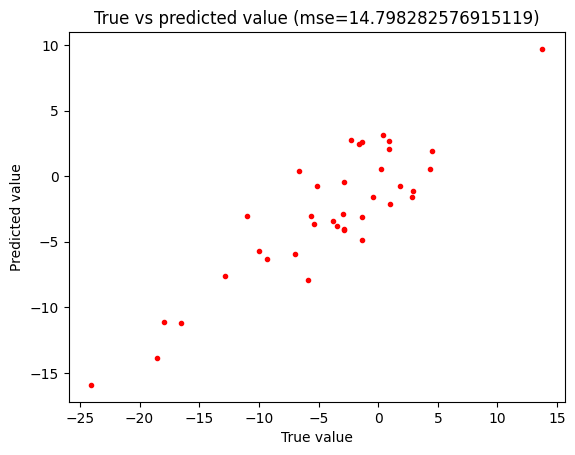

In [93]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()

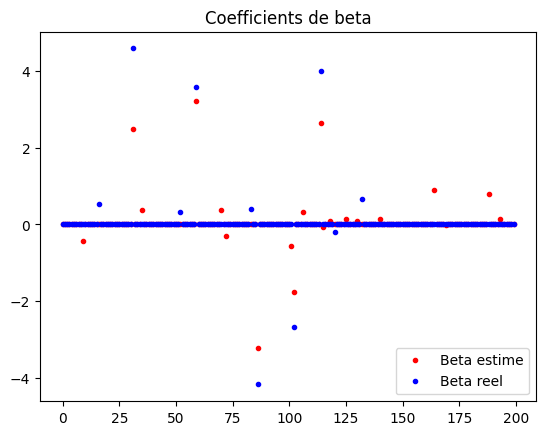

In [94]:
fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

Plus n diminue, plus la MSE augmente et moins le nuage de points y_pred,y_true semble suivre la droite y=x


### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

In [95]:
from sklearn.model_selection import KFold

n_splits=8
kf=KFold(n_splits=n_splits)
kf.get_n_splits(X=X)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
  Test:  index=[0 1 2 3 4 5 6 7 8 9]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
  Test:  index=[10 11 12 13 14 15 16 17 18 19]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
  Test:  index=[20 21 22 23 24 25 26 27 28 29]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 

In [96]:
mse = []
for alpha in [0.001,0.01,0.1,1, 10]:
    mse_alpha = 0
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        lasso_regressor = Lasso(alpha=alpha, max_iter=2000)
        lasso_regressor.fit(X[train_index], y[train_index])

        y_pred_lasso = lasso_regressor.predict(X[test_index])
        mse_score_lasso = mean_squared_error(y[test_index], y_pred_lasso)
        mse_alpha += mse_score_lasso
    mse_alpha = mse_alpha / n_splits
    mse.append(mse_alpha)
    print(f"alpha={alpha}, mse={mse_alpha}")

alpha=0.001, mse=14.728125519564333
alpha=0.01, mse=14.279992374168355
alpha=0.1, mse=11.00098340640826
alpha=1, mse=15.32789734007311
alpha=10, mse=75.72210367055503


In [97]:
mse = []
for alpha in [0.2,0.25,0.3,0.35,0.4]:
    mse_alpha = 0
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        lasso_regressor = Lasso(alpha=alpha, max_iter=2000)
        lasso_regressor.fit(X[train_index], y[train_index])

        y_pred_lasso = lasso_regressor.predict(X[test_index])
        mse_score_lasso = mean_squared_error(y[test_index], y_pred_lasso)
        mse_alpha += mse_score_lasso
    mse_alpha = mse_alpha / n_splits
    mse.append(mse_alpha)
    print(f"alpha={alpha}, mse={mse_alpha}")

alpha=0.2, mse=9.203701952058172
alpha=0.25, mse=8.877750116673333
alpha=0.3, mse=8.83170720931029
alpha=0.35, mse=8.969011794728516
alpha=0.4, mse=9.212862708317793


On choisit alpha = 0.3

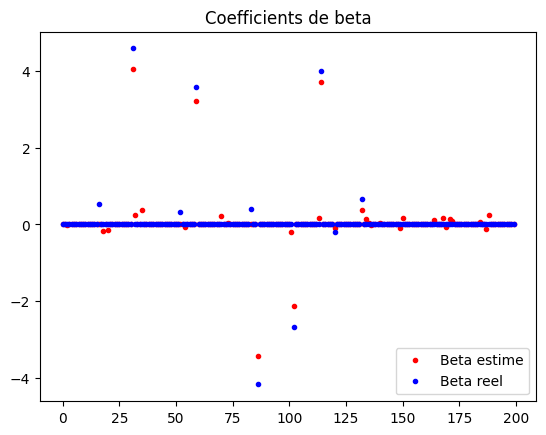

In [98]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

lasso_regressor = Lasso(alpha=0.3, max_iter=2000)
lasso_regressor.fit(X[train_index], y[train_index])

y_pred_lasso = lasso_regressor.predict(X[test_index])
mse_score_lasso = mean_squared_error(y[test_index], y_pred_lasso)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


In [125]:
from sklearn.linear_model import LinearRegression

def BIC(n,q,mse):
    return n*np.log(mse) + np.log(n)*(q+1)

q=1
bic_prev = None
bic = None
selected_p = []
while q<=p and ((len(selected_p) in [0,1]) or bic < bic_prev) :

    for p_current in range(p):
        bic_p_min = np.inf
        p_min = None
        if not p in selected_p:
            current_selected_p = selected_p.copy()
            current_selected_p.append(p_current)
            lr = LinearRegression()
            lr.fit(X_train[:,current_selected_p], y_train)

            mse = mean_squared_error(y_test, lr.predict(X_test[:,current_selected_p]))
            
            bic_p = BIC(n,q,mse)
            if bic_p < bic_p_min:
                bic_p_min = bic_p
                p_min = p_current

        bic_prev = bic
        bic = bic_p_min
        if bic_prev==None or bic_prev > bic_p_min:
            selected_p.append(p_min)
        q+=1

In [127]:
selected_p

[0,
 10,
 19,
 21,
 25,
 31,
 34,
 37,
 41,
 44,
 46,
 48,
 55,
 60,
 73,
 77,
 79,
 82,
 85,
 86,
 89,
 91,
 93,
 96,
 97,
 99,
 102,
 105,
 108,
 110,
 113,
 114,
 116,
 120,
 123,
 126,
 129,
 130,
 132,
 133,
 135,
 141,
 142,
 149,
 154,
 159,
 162,
 165,
 167,
 169,
 172,
 178,
 184,
 187,
 189,
 193]

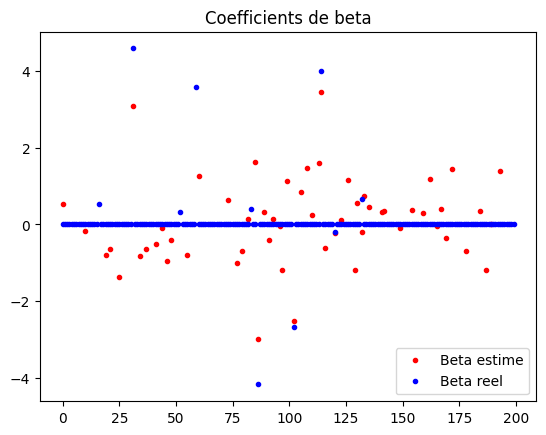

In [129]:
lr = LinearRegression()
lr.fit(X_train[:,selected_p], y_train)

mse_score_lasso = mean_squared_error(y_test, lr.predict(X_test[:,selected_p]))

fig = plt.figure()
plt.plot(selected_p,lr.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()